In [1]:
from src.MSM.class_MSM import *
from src.MSM.MSM_util import *

from src.MSM.its import *

from src.Integration.integration_util import * 
from src.potentials import * 

#from scipy.sparse.linalg import eigs
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## https://github.com/markovmodel/msmtools/tree/devel/msmtools

In [13]:
## INPUT
#################

Potential = Potentials_1D.doublewell()
n_bins    = 100

## load/test/discretize trajectory
#################
trajectories = np.load('Trajectory/trajs_GSD_DW_100_107_1-0001.npy', mmap_mode='r')
## Attention: select the best stepsize
trajectory=trajectories[3]

#check_Boltzmann(trajectory,Potential)

## initialize MSM
#################

kwargs_MSM_model = { 
    'trajectory'     : trajectory ,
    'bins'           : n_bins      ,
    'lag'            : 50        , 
    'sliding'        : True     ,
    'sparse_return'  : True     ,
    'nstates'        : None     ,
    'itstau'         : 50
} # in the moment no other options are possible !!!, is it the same: lag vs sliding cf. theory bettina

MSM_model = MSM(**kwargs_MSM_model)
#dtraj=MSM_model.dtrajectory()


In [14]:
## eigenvalues//eigenvectors
#################

lamb = MSM(**kwargs_MSM_model).eigenvalues()
l    = MSM(**kwargs_MSM_model).eigenvectors()


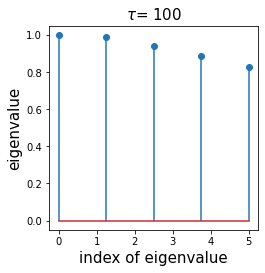

In [4]:
## show eigenvalues 
#################
plotMSMeigenvalues(np.array([lamb[:5].real]),np.array([100]))

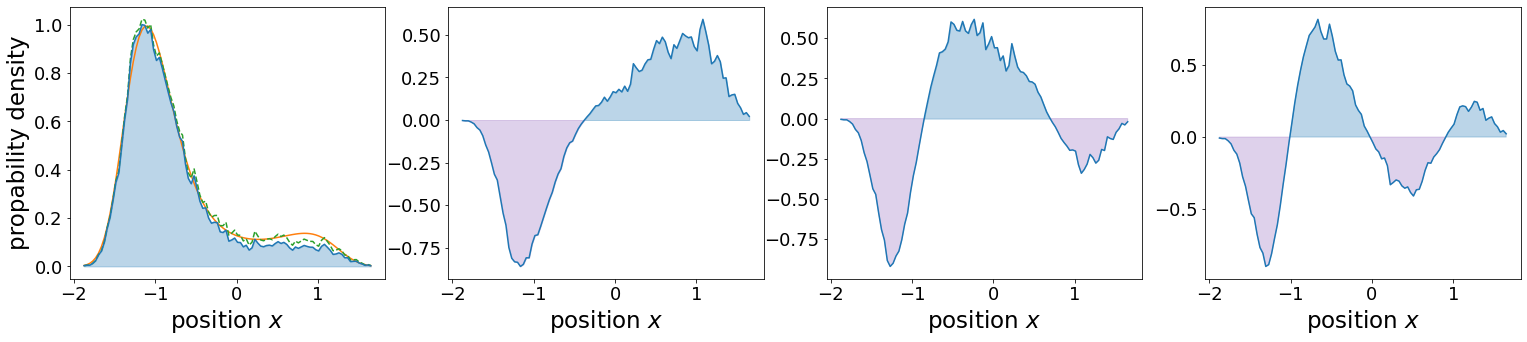

In [15]:
## show first 4 eigenvectors
#################
## could also give a function that l is evaluated inside if it isnt given
check_MSMeigenvectors(trajectory, Potential, l, n_bins)

In [10]:
## implied time scales 
#################
tau         = np.array([1,2,3,5,20,50,150,300])
ITS, Lambda = timescales_for_tau_list(trajectory,tau,n_bins, k=5)

#tau_2           = np.array([1,2,3,5,10,15])
#ITS_2, Lambda_2 = timescales_for_tau_list(trajectory,tau_2,n_bins, k=5)

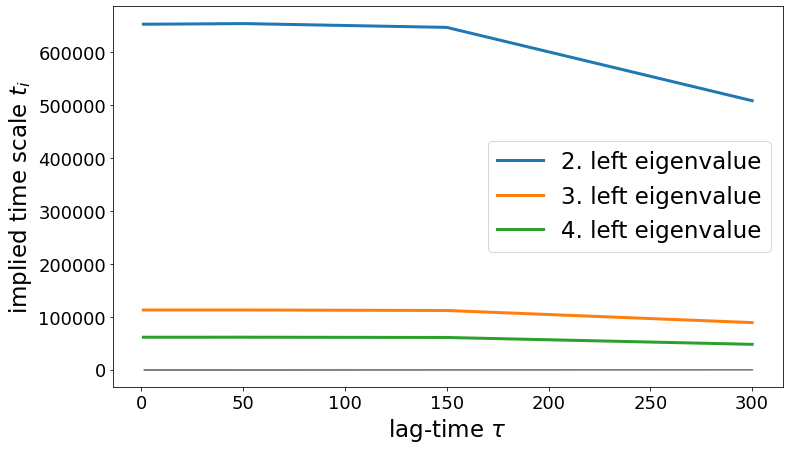

In [11]:
## show implied time scales 
#################
plotITS(ITS, tau)
#plotITS(ITS_2, tau_2)

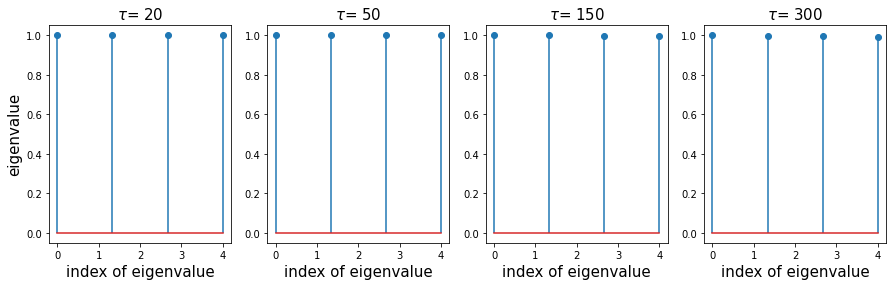

In [22]:
## show eigenvalues 
#################
plotMSMeigenvalues(abs(Lambda[4:8]),tau[4:8])
#plotMSMeigenvalues(abs(Lambda_2),tau_2)